In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

In [5]:
# Lets Review 
# Here we have an array that mimics a coin
outcomes = make_array('heads', 'tails')

In [6]:
# Recall last time we have a function 
# np.random.choice(array,number_selected) 
# that allows us to randomly select elements

np.random.choice(outcomes,1)

array(['tails'], dtype='<U5')

In [7]:
# Try to flip the coin 100 times
#
#
np.random.choice(outcomes, 10)

array(['heads', 'tails', 'tails', 'heads', 'tails', 'tails', 'tails',
       'heads', 'tails', 'tails'], dtype='<U5')

In [8]:

# Now we can find the total number of heads or tails using 
# conditionals

# Find the number of heads out of 100 flips
np.random.choice(outcomes, 10) == 'heads'
# The output of this a boolean array: True means it landed on Heads
# False means it did not

array([ True,  True, False,  True,  True,  True,  True, False,  True,
       False])

In [9]:
# Now Sum of the values. Remeber True = 1, False = 0  
sum(np.random.choice(outcomes, 10) == 'heads')

6

In [10]:
#Lets make a function that will toss a coin 100 times
#and then count up the number of heads

def heads_in_100_tosses():
    return sum(np.random.choice(outcomes, 100) == 'heads')

In [11]:
# Lets make run this coin toss 10000 times and 
# see whats more likely heads or tails!

results = make_array()

for i in np.arange(10000):
    results = np.append(results, heads_in_100_tosses())
    
results

array([53., 57., 47., ..., 49., 52., 42.])

In [12]:
# make our table to look at heads

heads = Table().with_columns('Heads', results)
heads

Heads
53
57
47
47
48
50
45
55
52
62


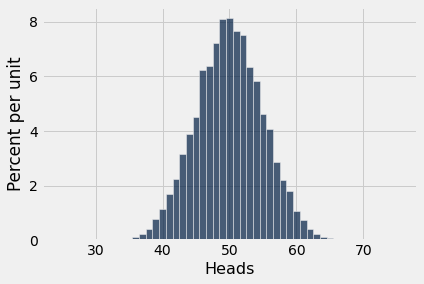

In [13]:
# Display with a histogram: set bins=np.arange(24.5, 76.5) 
heads.hist('Heads', bins=np.arange(24.5, 76.5))

## Monty Hall

In [14]:
# Lets simulate the monty hall problem
# and see what we should chose

# We will base our results on playing the Monty Hall problem 1000 times

doors = make_array('car', 'first goat', 'second goat')

In [15]:

# First we need to represent the doors with goats
goats = make_array('first goat', 'second goat')



# Make a function that takes a goat as an input
# and returns the other goat
def other_goat(a_goat):
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [16]:
# Try out our choice of goat 
other_goat('first goat')

'second goat'

In [17]:
other_goat('wheeler hall')

In [43]:
# To simulate this expirement we need to do the following
# 1. Contestant randomly chooses a door

# 2. conditions
#    either Contestant choose door with goat 1
#    or Contestant choose  door with goat 2
#    or contestant choose door with prize

# 3. return results of contestants choice

def monty_hall():
    
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return make_array(contestant_choice, monty_choice, remaining_door)

In [44]:
# Lets run our simulation
monty_hall()

array(['first goat', 'second goat', 'car'], dtype='<U11')

In [45]:
games = Table(['Guess', 'Revealed', 'Remaining'])
Guess = make_array()
Revealed = make_array()
Remaining = make_array()


for i in range(3000):
    results = monty_hall()
    Guess=np.append(Guess,results.item(0))
    Revealed=np.append(Revealed,results.item(1))
    Remaining=np.append(Remaining,results.item(2))
    


array(['second goat', 'car', 'first goat', ..., 'first goat',
       'second goat', 'first goat'], dtype='<U32')

In [47]:
# Lets make our table
games = Table().with_columns('Guess',Guess,'Revealed',Revealed,'Remaining',Remaining)
games

Guess,Revealed,Remaining
second goat,first goat,car
car,first goat,second goat
first goat,second goat,car
car,second goat,first goat
first goat,second goat,car
first goat,second goat,car
second goat,first goat,car
second goat,first goat,car
car,first goat,second goat
car,first goat,second goat


In [48]:
# Group based on the Remaining
# This would be the same as choosing the other door 
swi=games.group('Remaining')
swi

Remaining,count
car,2003
first goat,517
second goat,480


In [49]:
# Group based on Guess
# This would be the same as keeping our orginal choose
gue=games.group('Guess')
gue

Guess,count
car,997
first goat,1015
second goat,988


In [54]:
# Lets compare the results using a bargraph
ok = swi.join('Remaining',gue,'Guess')
ok=ok.relabel('count','switch').relabel('count_2','keep')

Remaining,switch,keep
car,2003,997
first goat,517,1015
second goat,480,988


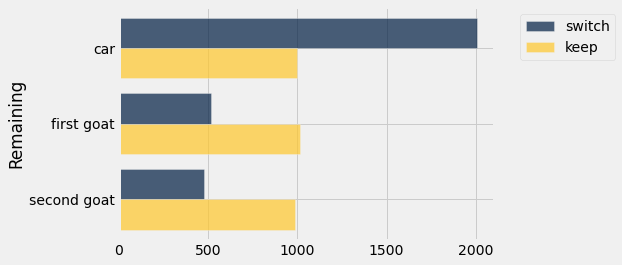

In [55]:
ok.barh('Remaining')